

```
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None

```



# Problem Statement 


```
How to Optimize marketing campaigns using data from previous marketing campaign.
The classification goal is to predict if the client will subscribe a term deposit (variable y).
```



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# contact is a categorical variable with "unkown"
# poutcome is a categorical variable with "unkown"
# job
# education

numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [8]:
numeric_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [9]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [10]:
categorical_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [11]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

Replacing Unknown values

In [12]:
df.replace('unknown', np.NaN, inplace = True)

In [13]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [14]:
for column in df.columns:
  print(column, " : ", df[column].nunique())

age  :  77
job  :  11
marital  :  3
education  :  3
default  :  2
balance  :  7168
housing  :  2
loan  :  2
contact  :  2
day  :  31
month  :  12
duration  :  1573
campaign  :  48
pdays  :  559
previous  :  41
poutcome  :  3
y  :  2


# Exploratory Data Analysis

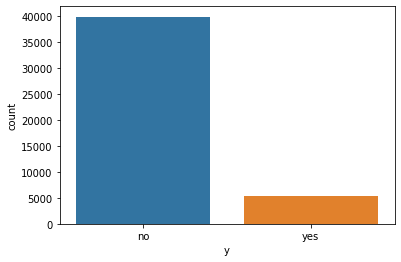

In [15]:
output = sns.countplot(x = df['y'])
plt.show()

In [16]:
df[df['y'] == 'no'].y.count() / df.y.count() * 100 

88.30151954170445



```
This depicts that output is an example of imbalanced dataset. 
88.3 % of the time the output is "no". 
Hence if our model predicts "no" by default in all the cases, the accuracy would still be 88.3%.
```



Job 




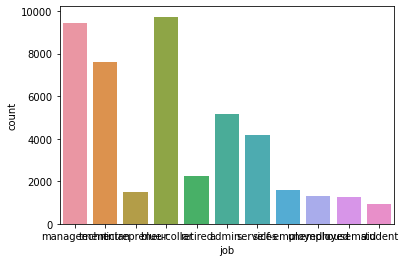




Marital 




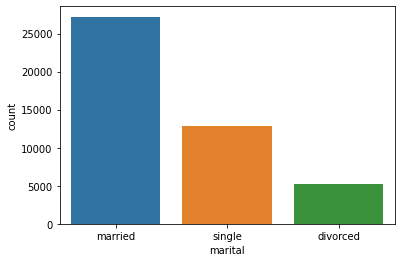




Education 




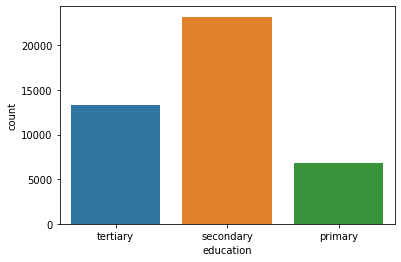




Default 




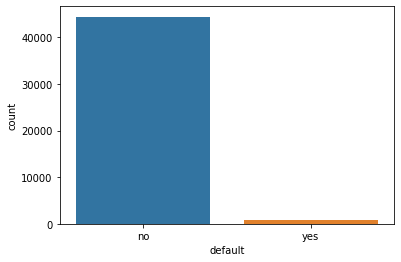




Housing 




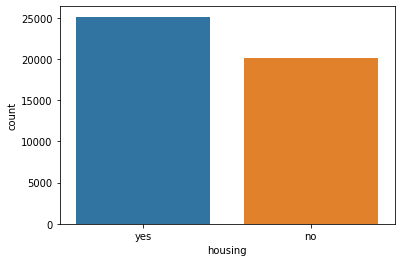




Loan 




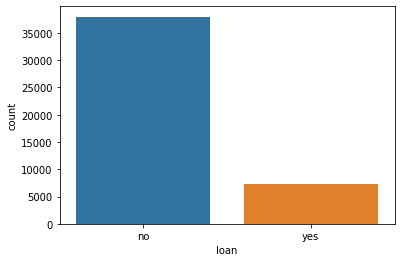




Contact 




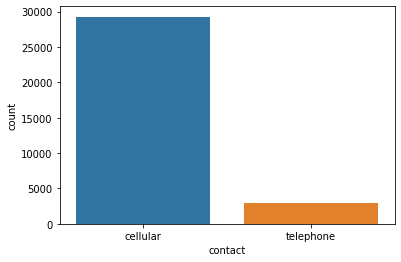




Month 




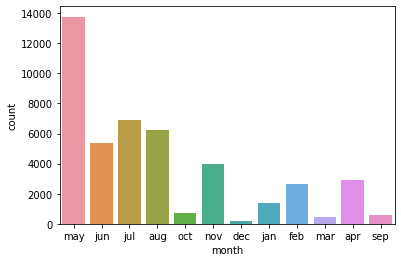




Poutcome 




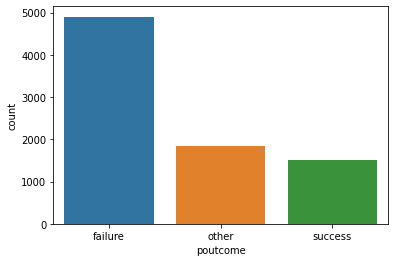




Y 




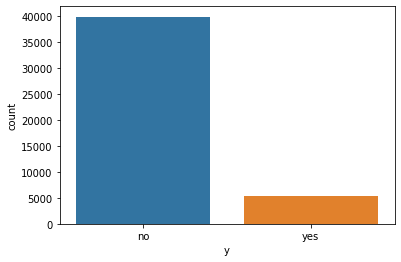

In [17]:
for col in categorical_cols:
  print(col.title(), "\n\n")
  output = sns.countplot(x = df[col])
  plt.show()
  print("\n\n")


Job 




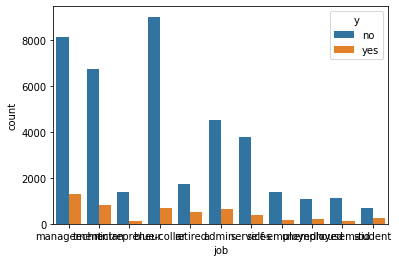




Marital 




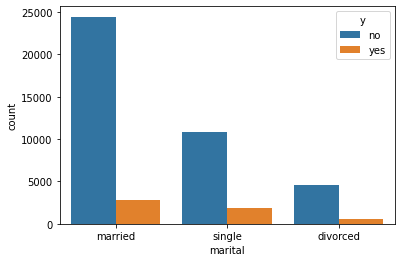




Education 




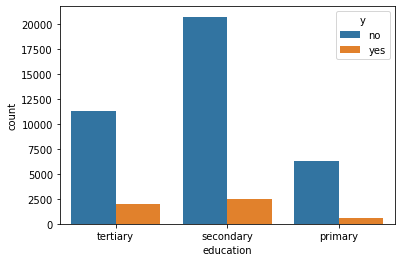




Default 




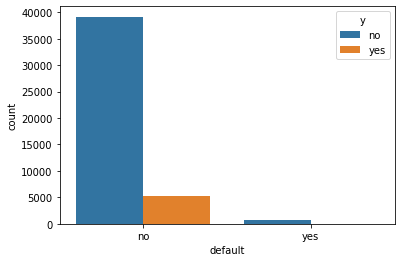




Housing 




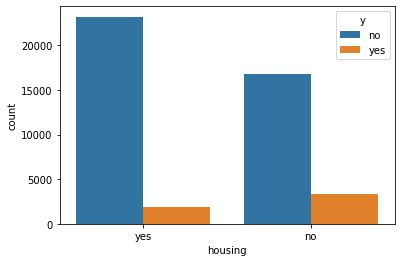




Loan 




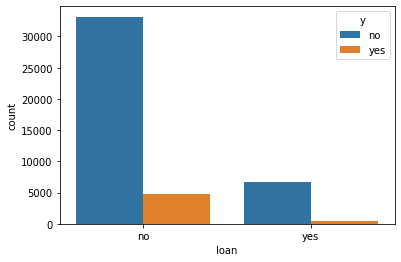




Contact 




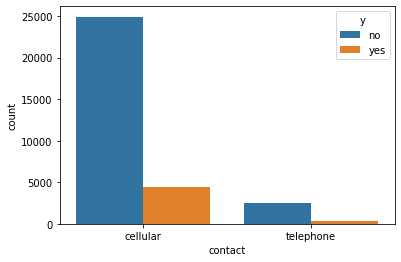




Month 




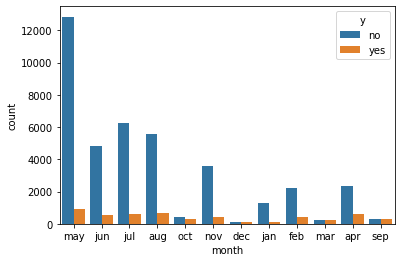




Poutcome 




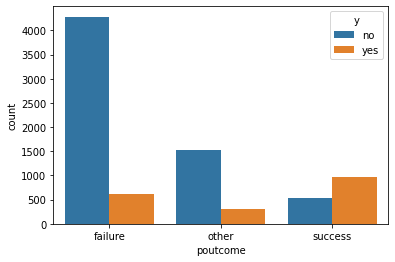




Y 




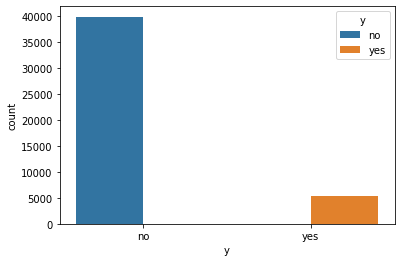

In [18]:
for col in categorical_cols:
  print(col.title(), "\n\n")
  output = sns.countplot(x = df[col], hue= df['y'])
  plt.show()
  print("\n\n")



```
default: has credit in default? (binary: "yes","no")
has no impact on person subscribing the term deposit

We can remove this attribute from our data set
```



In [19]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [20]:
df[categorical_cols]

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,NaN,may,NaN,no
1,technician,single,secondary,no,yes,no,NaN,may,NaN,no
2,entrepreneur,married,secondary,no,yes,yes,NaN,may,NaN,no
3,blue-collar,married,NaN,no,yes,no,NaN,may,NaN,no
4,NaN,single,NaN,no,no,no,NaN,may,NaN,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,NaN,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,NaN,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,NaN,no


In [21]:
categorical_cols = list((set(categorical_cols) - set(['default'])))

In [22]:
categorical_cols

['job',
 'housing',
 'education',
 'poutcome',
 'contact',
 'marital',
 'y',
 'month',
 'loan']

In [23]:
df.drop(["default"], axis = 1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    32191 non-null  object
 8   day        45211 non-null  int64 
 9   month      45211 non-null  object
 10  duration   45211 non-null  int64 
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   8252 non-null   object
 15  y          45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [25]:
# Dropping all the null values from df
df.dropna(inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24060 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   job        7842 non-null   object
 2   marital    7842 non-null   object
 3   education  7842 non-null   object
 4   balance    7842 non-null   int64 
 5   housing    7842 non-null   object
 6   loan       7842 non-null   object
 7   contact    7842 non-null   object
 8   day        7842 non-null   int64 
 9   month      7842 non-null   object
 10  duration   7842 non-null   int64 
 11  campaign   7842 non-null   int64 
 12  pdays      7842 non-null   int64 
 13  previous   7842 non-null   int64 
 14  poutcome   7842 non-null   object
 15  y          7842 non-null   object
dtypes: int64(7), object(9)
memory usage: 1.0+ MB




```
Applying the same process for Numerical varibles
```



In [27]:

# duration: last contact duration, in seconds (numeric). 
# Important note: this attribute highly affects the output target 
# (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. 
# Also, after the end of the call y is obviously known. 
# Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:





In [28]:
numerical_cols = list(set(numerical_cols) - set(['duration']))

In [29]:
duration = df["duration"]
df.drop(["duration"], axis = 1, inplace=True)

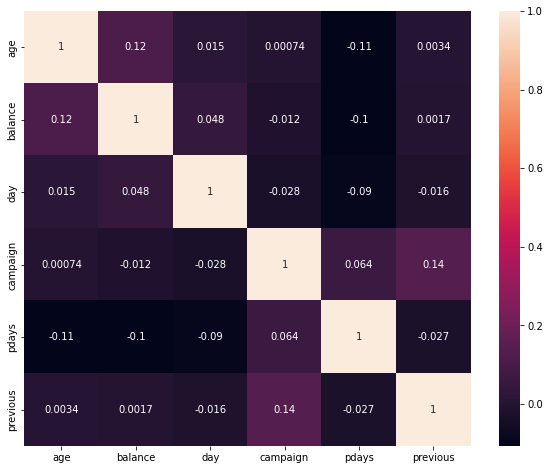

In [30]:
# PLotting the heatmap using seaborn pollting the corelation of variables 
# assuming 0.6 to be safe parameter
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [31]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [32]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,882,no,no,telephone,21,oct,1,151,3,failure,no
24062,42,admin.,single,secondary,-247,yes,yes,telephone,21,oct,1,166,1,other,yes
24064,33,services,married,secondary,3444,yes,no,telephone,21,oct,1,91,4,failure,yes
24072,36,management,married,tertiary,2415,yes,no,telephone,22,oct,1,86,4,other,no
24077,36,management,married,tertiary,0,yes,no,telephone,23,oct,1,143,3,failure,yes


In [33]:
df[numerical_cols].describe()

,day,pdays,campaign,balance,previous,age
count,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000
mean,14.260010,223.252869,2.064269,1552.343280,3.184264,40.783856
std,7.885328,111.830127,1.566109,3084.580003,4.614190,11.282964
min,1.000000,1.000000,1.000000,-1884.000000,1.000000,18.000000
25%,7.000000,133.000000,1.000000,162.000000,1.000000,32.000000
50%,14.000000,195.000000,2.000000,595.000000,2.000000,38.000000
75%,20.000000,326.000000,2.000000,1733.750000,4.000000,47.000000
max,31.000000,871.000000,16.000000,81204.000000,275.000000,89.000000


In [34]:
df['y'].value_counts()

no     6056
yes    1786
Name: y, dtype: int64

Day 




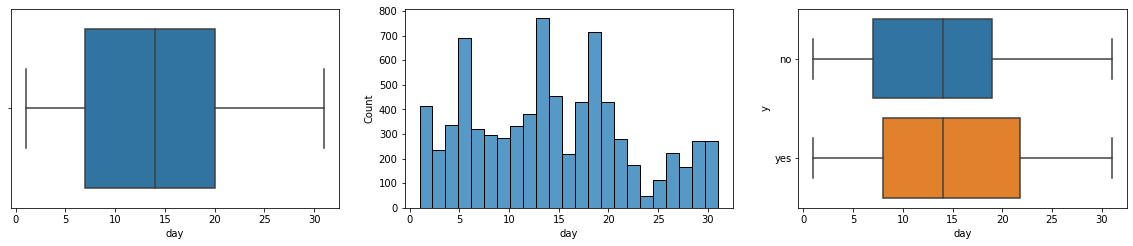

Pdays 




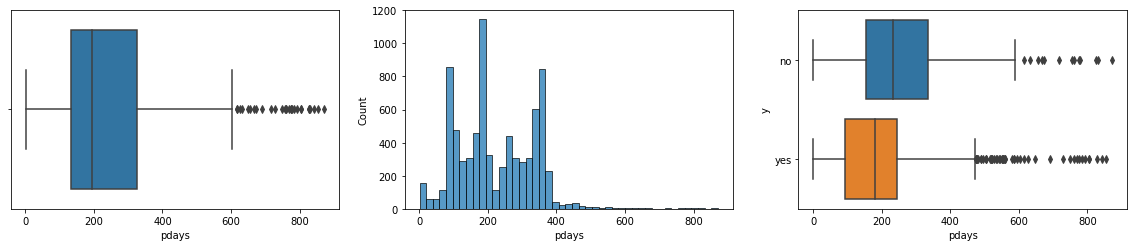

Campaign 




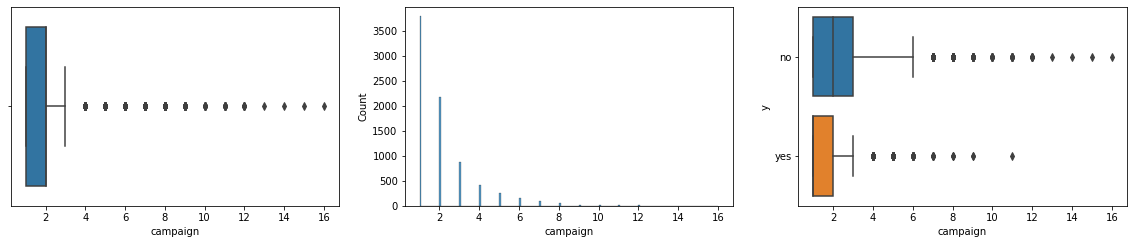

Balance 




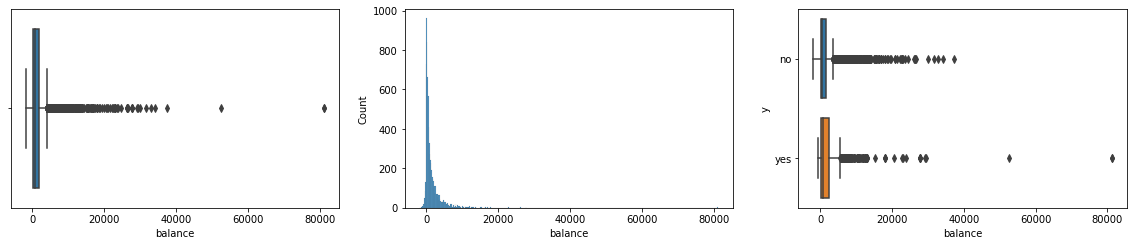

Previous 




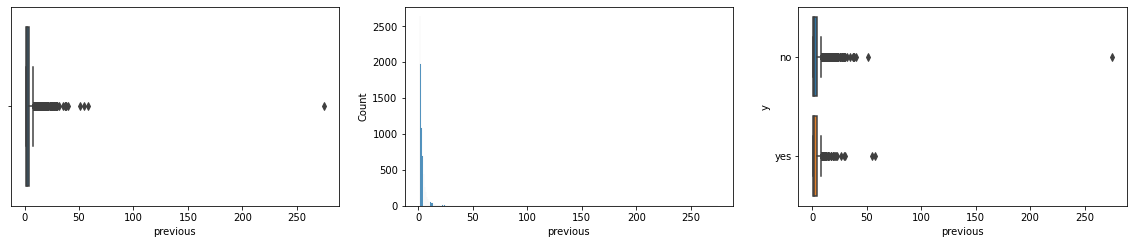

Age 




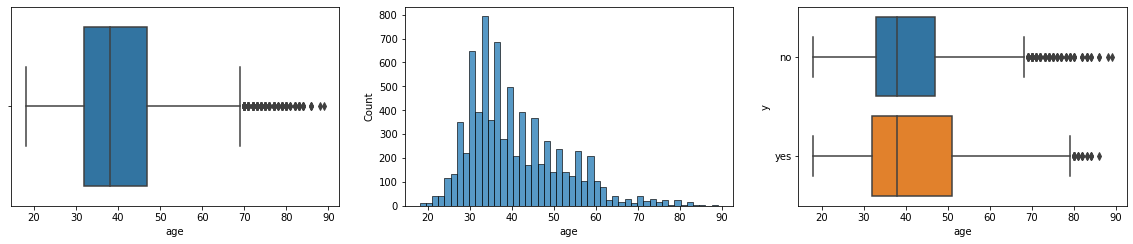

In [35]:
i = 1
for col in numerical_cols:
  print(col.title(), "\n\n")
  #subplot(nrows, ncols, index, **kwargs)
  plt.figure(figsize=(20,30))
  plt.subplot(len(numerical_cols)+1, 3, i)
  sns.boxplot(x = df[col])
  i += 1
  plt.subplot(len(numerical_cols)+1, 3, i)
  sns.histplot(x = df[col])
  i += 1
  plt.subplot(len(numerical_cols)+1, 3, i)
  sns.boxplot(x = df[col], y = df['y'])
  i += 1
  plt.show()

In [36]:
# q (n + 1) : Quantile
# Look into 'campaign', 'age', 'previous',  'pdays'
print(len(df['campaign']))
print(df['campaign'].quantile(0.05), len(df[df['campaign'] < df['campaign'].quantile(0.05)]))
print(df['campaign'].quantile(0.95), len(df[df['campaign'] > df['campaign'].quantile(0.95)]))

7842
1.0 0
5.0 355


In [37]:
df1 = df[(df["campaign"] > 23) & (df["y"] == 'yes')]
len(df1[['campaign', 'y']])

0

In [38]:
df1 = df[(df["campaign"] > 8) & (df["y"] == 'yes')]
print(len(df1[['campaign', 'y']]), len(df[df["campaign"]>8]))

3 57


In [39]:
df["campaign"] = df["campaign"].apply(lambda x: 8 if x > 8 else x)

If we reach out to client more than 23 days in the campaign period then it is highly unlikely that client will subscribe to the term deposit. Also for number = 8 seems to be high.

In [40]:
print(df["pdays"].quantile(0.05), len(df[df["pdays"]<df["pdays"].quantile(0.05)] ))
print(df["pdays"].quantile(0.95), len(df[df["pdays"]>df["pdays"].quantile(0.95)] ))

79.0 384
370.0 323


In [41]:
print("pdays max = 871 hence the deposits should be 0")
df1 = df[(df["pdays"] >= 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]>=999]))
print("Checking deposits for pdays < 999")
df1 = df[(df["pdays"] < 999) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<999]))
print("Checking deposits for pdays < 28")
df1 = df[(df["pdays"] < 28) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<28]))
print("Checking deposits for pdays < 20")
df1 = df[(df["pdays"] < 20) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<20]))
print("Checking deposits for pdays < 10")
df1 = df[(df["pdays"] < 10) & (df["y"] == 'yes')]
print(len(df1[['pdays', 'y']]), len(df[df["pdays"]<10]))

pdays max = 871 hence the deposits should be 0
0 0
Checking deposits for pdays < 999
1786 7842
Checking deposits for pdays < 28
25 169
Checking deposits for pdays < 20
21 152
Checking deposits for pdays < 10
13 116


There is no point in keeping the pdays less than 20 days as the number of deposits are not substantials

In [42]:
# visualizing numerical columns
def plot_pair():
  sns.pairplot(hue='y', data = df)
  plt.show()

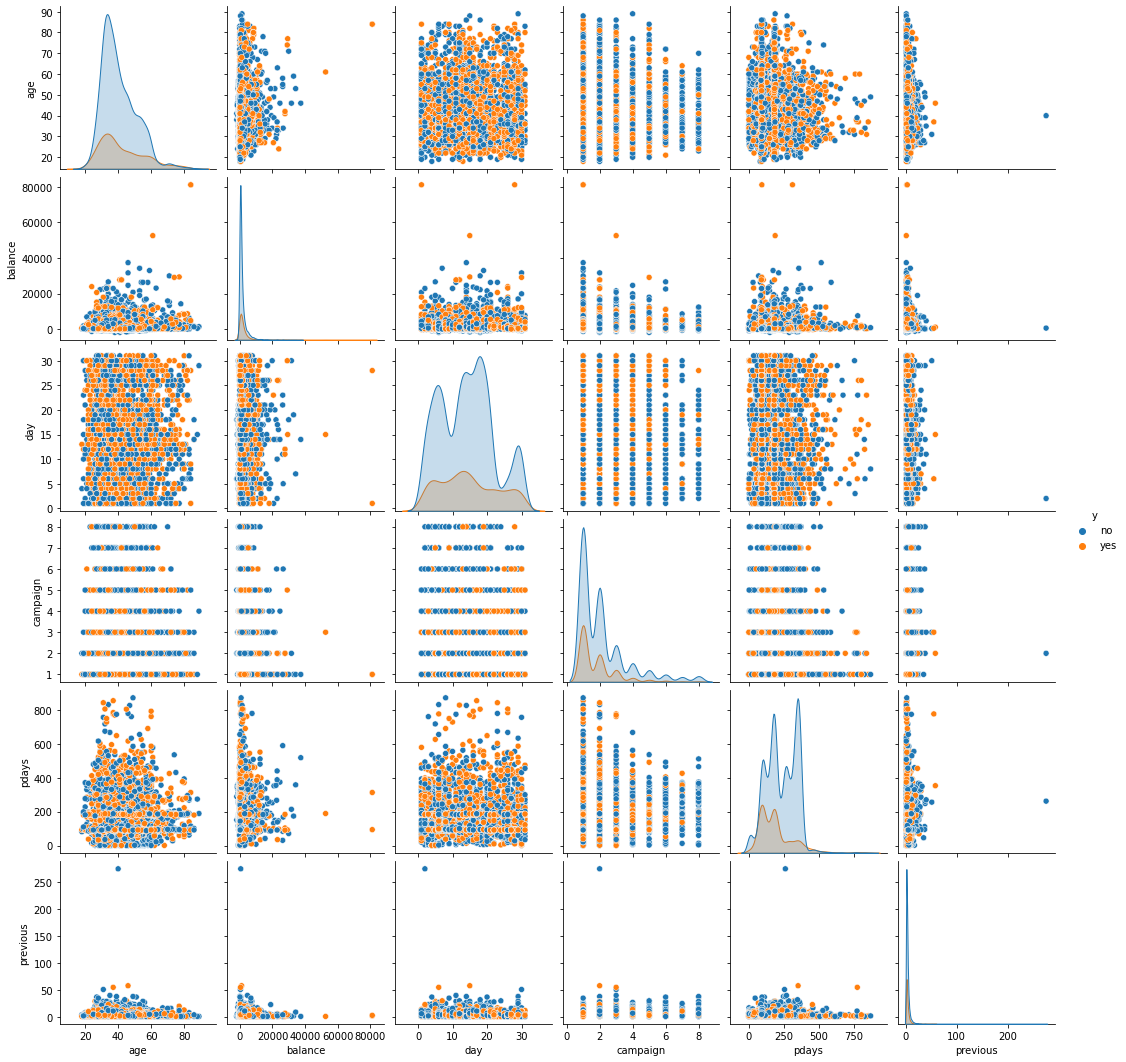

In [43]:
plot_pair()



```
This is the past data we are working on and while working in new data we 
will not be able to gain access to "campaign " path beforehand.
Therefore it is better to delete this attribute form our dataframe.
```



In [44]:
df.drop(['campaign'], axis = 1, inplace=True)
numerical_cols = list(set(numerical_cols) - set(['campaign']))

In [45]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [46]:
print(len(categorical_cols), categorical_cols)
print(len(numerical_cols), numerical_cols)

9 ['job', 'housing', 'education', 'poutcome', 'contact', 'marital', 'y', 'month', 'loan']
5 ['day', 'pdays', 'balance', 'previous', 'age']


In [47]:
for col in categorical_cols:
  print(df[col].value_counts())
  print("\n\n")

management       1753
blue-collar      1537
technician       1289
admin.           1057
services          682
retired           458
self-employed     264
student           237
entrepreneur      211
unemployed        208
housemaid         146
Name: job, dtype: int64



yes    4942
no     2900
Name: housing, dtype: int64



secondary    4197
tertiary     2633
primary      1012
Name: education, dtype: int64



failure    4679
other      1750
success    1413
Name: poutcome, dtype: int64



cellular     7257
telephone     585
Name: contact, dtype: int64



married     4501
single      2454
divorced     887
Name: marital, dtype: int64



no     6056
yes    1786
Name: y, dtype: int64



may    2436
nov    1093
apr    1075
feb     881
aug     493
jan     472
oct     312
jun     302
sep     281
jul     225
mar     160
dec     112
Name: month, dtype: int64



no     6753
yes    1089
Name: loan, dtype: int64







```
Here we can observe that "housing", "y" and "loan" has categorical values of "yes" and "no"

So let us convert them in :
"yes" : 1
"no" : 0
```



In [48]:
attributes = ["housing", "y", "loan"]
df[attributes] = df[attributes].apply(lambda x: x.map({'yes':1, "no":0}))

In [49]:
for col in categorical_cols:
  print(df[col].value_counts())
  print("\n\n")

management       1753
blue-collar      1537
technician       1289
admin.           1057
services          682
retired           458
self-employed     264
student           237
entrepreneur      211
unemployed        208
housemaid         146
Name: job, dtype: int64



1    4942
0    2900
Name: housing, dtype: int64



secondary    4197
tertiary     2633
primary      1012
Name: education, dtype: int64



failure    4679
other      1750
success    1413
Name: poutcome, dtype: int64



cellular     7257
telephone     585
Name: contact, dtype: int64



married     4501
single      2454
divorced     887
Name: marital, dtype: int64



0    6056
1    1786
Name: y, dtype: int64



may    2436
nov    1093
apr    1075
feb     881
aug     493
jan     472
oct     312
jun     302
sep     281
jul     225
mar     160
dec     112
Name: month, dtype: int64



0    6753
1    1089
Name: loan, dtype: int64





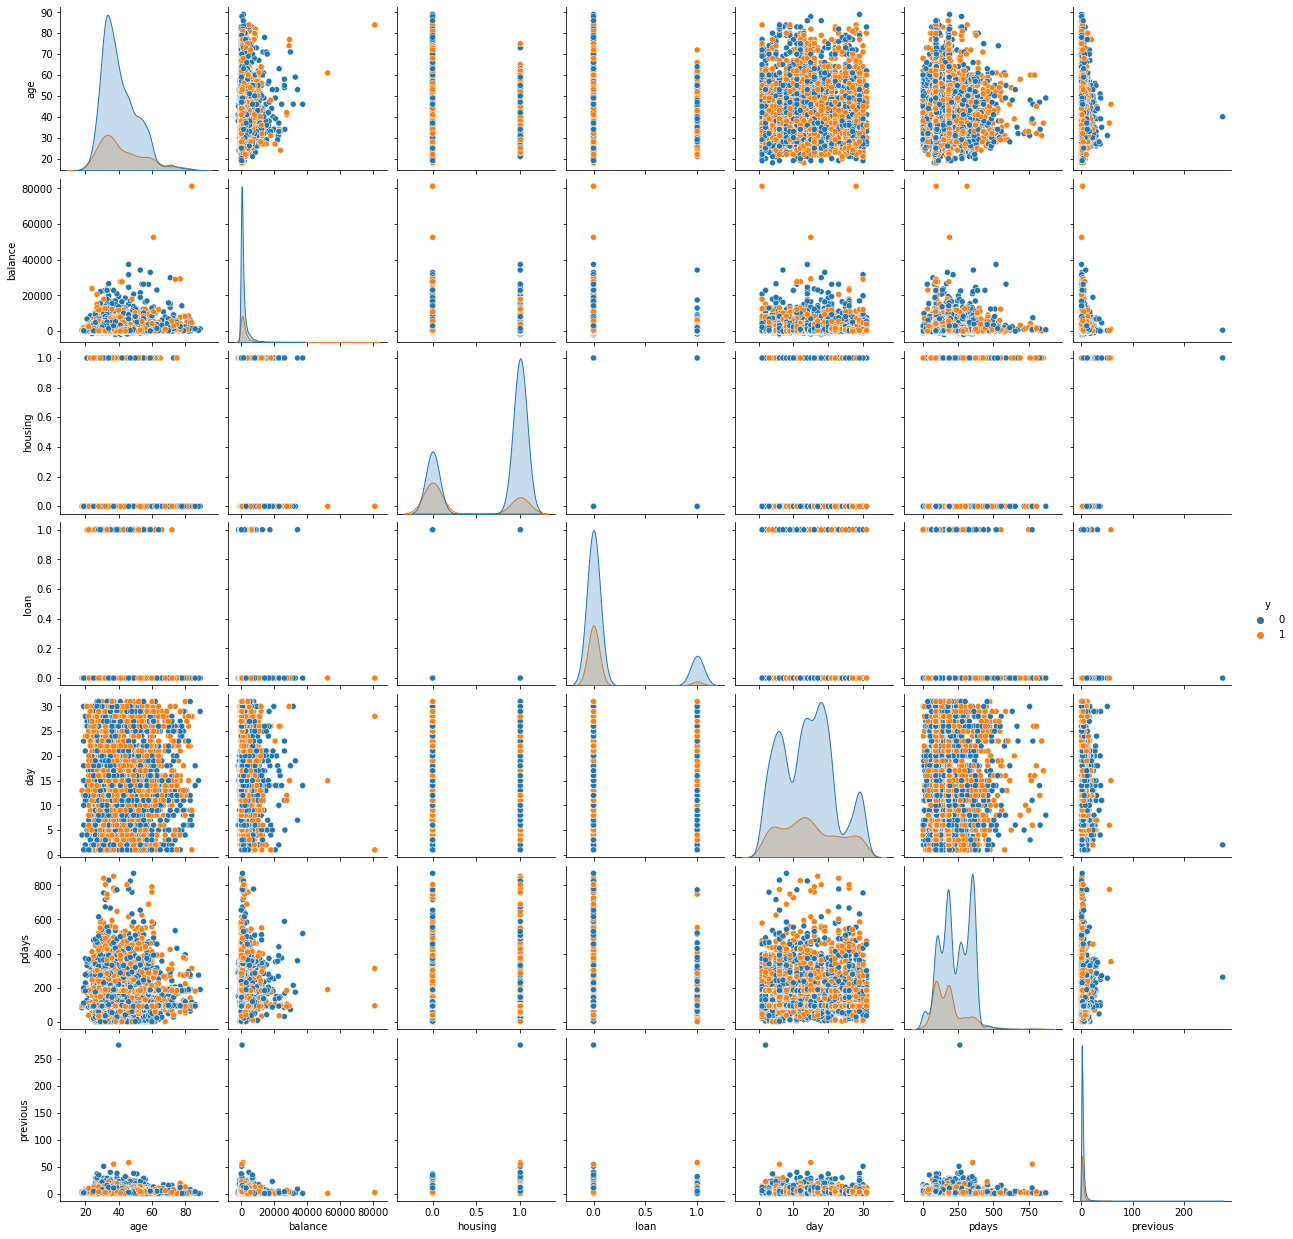

In [50]:
plot_pair()

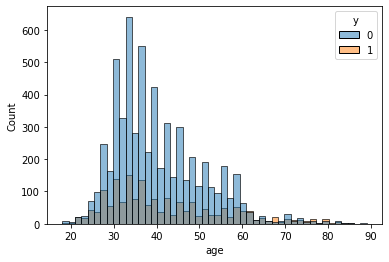

In [51]:
sns.histplot(x = 'age', hue='y', data = df)
plt.show()

"balance" is not on scale

# One Hot Encoding

In [52]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,882,0,0,telephone,21,oct,151,3,failure,0
24062,42,admin.,single,secondary,-247,1,1,telephone,21,oct,166,1,other,1
24064,33,services,married,secondary,3444,1,0,telephone,21,oct,91,4,failure,1
24072,36,management,married,tertiary,2415,1,0,telephone,22,oct,86,4,other,0
24077,36,management,married,tertiary,0,1,0,telephone,23,oct,143,3,failure,1


In [53]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [54]:
# age - NR
# job - Done
# marital - Done
# education - Done
# balance - Not required
# housing - NR
# loan - NR
# contact - Done
# day - NR
# month - - Done
# pdays - NR
# previous - NR
# poutcome - Done
# y - output

contact = pd.get_dummies(df.contact, drop_first=True)
poutcome = pd.get_dummies(df.poutcome, drop_first=True)
job = pd.get_dummies(df.job, drop_first=True)
month = pd.get_dummies(df.month, drop_first=True)
marital = pd.get_dummies(df.marital, drop_first=True)
education = pd.get_dummies(df.education, drop_first=True)

In [55]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,882,0,0,telephone,21,oct,151,3,failure,0
24062,42,admin.,single,secondary,-247,1,1,telephone,21,oct,166,1,other,1
24064,33,services,married,secondary,3444,1,0,telephone,21,oct,91,4,failure,1
24072,36,management,married,tertiary,2415,1,0,telephone,22,oct,86,4,other,0
24077,36,management,married,tertiary,0,1,0,telephone,23,oct,143,3,failure,1


In [56]:
df = pd.concat([df, contact, poutcome , job, month, marital, education], axis=1)
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,pdays,previous,poutcome,y,telephone,other,success,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,married,single,secondary,tertiary
24060,33,admin.,married,tertiary,882,0,0,telephone,21,oct,151,3,failure,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
24062,42,admin.,single,secondary,-247,1,1,telephone,21,oct,166,1,other,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
24064,33,services,married,secondary,3444,1,0,telephone,21,oct,91,4,failure,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
24072,36,management,married,tertiary,2415,1,0,telephone,22,oct,86,4,other,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
24077,36,management,married,tertiary,0,1,0,telephone,23,oct,143,3,failure,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [57]:
df.drop(['contact', 'poutcome' , 'job', 'month', 'marital', 'education'], axis = 1, inplace = True)
df.head()

,age,balance,housing,loan,day,pdays,previous,y,telephone,other,success,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,married,single,secondary,tertiary
24060,33,882,0,0,21,151,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
24062,42,-247,1,1,21,166,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
24064,33,3444,1,0,21,91,4,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
24072,36,2415,1,0,22,86,4,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
24077,36,0,1,0,23,143,3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [58]:
df.columns, len(df.columns)

(Index(['age', 'balance', 'housing', 'loan', 'day', 'pdays', 'previous', 'y',
        'telephone', 'other', 'success', 'blue-collar', 'entrepreneur',
        'housemaid', 'management', 'retired', 'self-employed', 'services',
        'student', 'technician', 'unemployed', 'aug', 'dec', 'feb', 'jan',
        'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'married', 'single',
        'secondary', 'tertiary'],
       dtype='object'), 36)

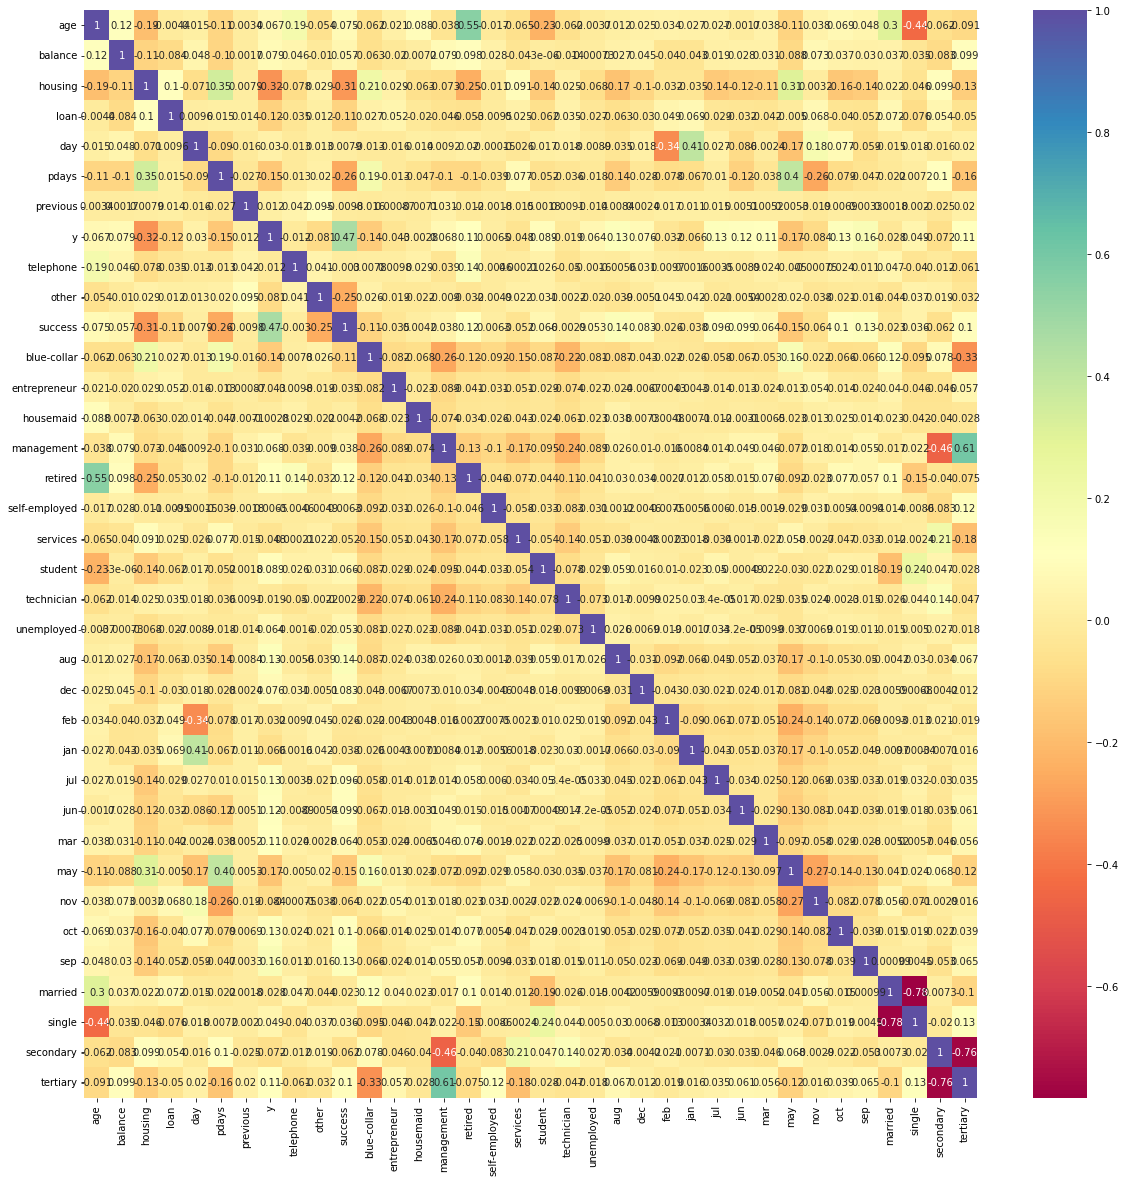

In [59]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

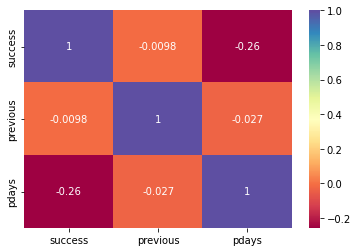

In [60]:
sns.heatmap(df[['success', 'previous', 'pdays']].corr(), annot=True, cmap='Spectral')
plt.show()

In [61]:
df.corr()['y']

age              0.067054
balance          0.079133
housing         -0.318413
loan            -0.117840
day              0.029525
pdays           -0.151380
previous         0.012383
y                1.000000
telephone       -0.011842
other           -0.080740
success          0.468504
blue-collar     -0.135615
entrepreneur    -0.043323
housemaid       -0.002815
management       0.068428
retired          0.113703
self-employed    0.006532
services        -0.047828
student          0.088848
technician      -0.018515
unemployed       0.063634
aug              0.132438
dec              0.075579
feb             -0.032397
jan             -0.065837
jul              0.127056
jun              0.118861
mar              0.108744
may             -0.169391
nov             -0.084219
oct              0.125920
sep              0.155413
married         -0.027728
single           0.049251
secondary       -0.071851
tertiary         0.113538
Name: y, dtype: float64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24060 to 45210
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            7842 non-null   int64
 1   balance        7842 non-null   int64
 2   housing        7842 non-null   int64
 3   loan           7842 non-null   int64
 4   day            7842 non-null   int64
 5   pdays          7842 non-null   int64
 6   previous       7842 non-null   int64
 7   y              7842 non-null   int64
 8   telephone      7842 non-null   uint8
 9   other          7842 non-null   uint8
 10  success        7842 non-null   uint8
 11  blue-collar    7842 non-null   uint8
 12  entrepreneur   7842 non-null   uint8
 13  housemaid      7842 non-null   uint8
 14  management     7842 non-null   uint8
 15  retired        7842 non-null   uint8
 16  self-employed  7842 non-null   uint8
 17  services       7842 non-null   uint8
 18  student        7842 non-null   uint8
 19  t

# Split Data Into Train and Test

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
df_full_train, df_test = train_test_split(df, random_state = 1, test_size = 0.20)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [65]:
print(len(df))
print(len(df_train))
print(len(df_val))
print(len(df_test))

7842
4704
1569
1569


In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [67]:
# MinMaxScaler Object
scaler = MinMaxScaler()

In [68]:
# Fit and Transform the data
# Fit will calculate our Min and Max values
# Transform will operate on standardisation function and scales our values
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [69]:
df_train.head()

,age,balance,housing,loan,day,pdays,previous,y,telephone,other,success,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,married,single,secondary,tertiary
42402,0.295775,0.026562,0,0,0.066667,0.219394,0.035088,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
31583,0.338028,0.049742,1,0,0.066667,0.163636,0.087719,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
32503,0.338028,0.032279,0,0,0.533333,0.408485,0.000000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
27007,0.436620,0.035974,1,0,0.666667,0.135758,0.017544,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
37531,0.408451,0.033471,1,0,0.400000,0.212121,0.017544,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [70]:
# Transform will operate on standardisation function and scales our values 
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [71]:
df_test.head()

,age,balance,housing,loan,day,pdays,previous,y,telephone,other,success,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,married,single,secondary,tertiary
39133,0.098592,0.018210,1,0,0.566667,0.419394,0.035088,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
41122,0.112676,0.032640,1,0,0.533333,0.240000,0.000000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
28611,0.549296,0.023601,1,1,0.933333,0.296970,0.017544,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
43613,0.154930,0.022903,0,0,0.100000,0.105455,0.052632,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
27855,0.507042,0.036263,0,1,0.900000,0.221818,0.122807,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [72]:
# Transform will operate on standardisation function and scales our values validation set
df_val[numerical_cols] = scaler.transform(df_val[numerical_cols])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [73]:
df_val.head()

,age,balance,housing,loan,day,pdays,previous,y,telephone,other,success,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,married,single,secondary,tertiary
33758,0.478873,0.022675,0,0,0.700000,0.332121,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
33531,0.211268,0.034734,1,0,0.633333,0.392727,0.052632,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
29672,0.154930,0.030558,1,0,0.066667,0.326061,0.017544,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
36942,0.267606,0.032387,1,0,0.366667,0.207273,0.052632,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
26696,0.436620,0.017006,1,0,0.633333,0.223030,0.105263,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24060 to 45210
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            7842 non-null   int64
 1   balance        7842 non-null   int64
 2   housing        7842 non-null   int64
 3   loan           7842 non-null   int64
 4   day            7842 non-null   int64
 5   pdays          7842 non-null   int64
 6   previous       7842 non-null   int64
 7   y              7842 non-null   int64
 8   telephone      7842 non-null   uint8
 9   other          7842 non-null   uint8
 10  success        7842 non-null   uint8
 11  blue-collar    7842 non-null   uint8
 12  entrepreneur   7842 non-null   uint8
 13  housemaid      7842 non-null   uint8
 14  management     7842 non-null   uint8
 15  retired        7842 non-null   uint8
 16  self-employed  7842 non-null   uint8
 17  services       7842 non-null   uint8
 18  student        7842 non-null   uint8
 19  t

In [75]:
# Divide the train data into X and y

y_train = df_train.pop('y')
X_train = df_train

y_test = df_test.pop('y')
X_test = df_test

y_val = df_val.pop('y')
X_val = df_val

In [76]:
y_train.head()

42402    0
31583    0
32503    0
27007    0
37531    0
Name: y, dtype: int64

In [77]:
y_val.head()

33758    0
33531    0
29672    0
36942    0
26696    0
Name: y, dtype: int64

In [78]:
y_test.head()

39133    0
41122    1
28611    0
43613    1
27855    0
Name: y, dtype: int64

In [79]:
y_train.value_counts()

0    3635
1    1069
Name: y, dtype: int64

In [80]:
y_test.value_counts()

0    1207
1     362
Name: y, dtype: int64

In [81]:
y_val.value_counts()

0    1214
1     355
Name: y, dtype: int64

In [82]:
X_train.shape

(4704, 35)

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [84]:
def prediction_model(model, X_train, y_train, X_val, y_val):
  y_train_pred = model.predict(X_train)
  y_train_pred_prob = model.predict_proba(X_train)[:, 1]
  y_val_pred = model.predict(X_val)
  y_val_pred_prob = model.predict_proba(X_val)[:, 1]
  return y_train_pred, y_train_pred_prob, y_val_pred, y_val_pred_prob

In [155]:
scores = dict()


# Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
logreg_model = LogisticRegression(random_state=0, solver='lbfgs')    #‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization.
logreg_model = logreg_model.fit(X_train, y_train)

In [87]:
y_train_pred, y_train_pred_prob, y_val_pred, y_val_pred_prob = prediction_model(logreg_model, X_train, y_train, X_val, y_val)

In [158]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy val: ", accuracy_score(y_val, y_val_pred))

accuracy_lr = round(accuracy_score(y_val, y_val_pred),3)
print(accuracy_lr)
scores['Logistic Regression'] = accuracy_lr

Accuracy train:  0.8273809523809523
Accuracy val:  0.8419375398342893
0.842


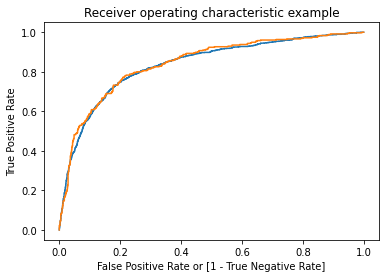

0.8357948075242901 0.8416641529572824


In [89]:
# drawing roc
train_fpr, train_tpr, train_thresholds =  metrics.roc_curve(y_train, y_train_pred_prob, drop_intermediate=False)
val_fpr, val_tpr, val_thresholds = metrics.roc_curve(y_val, y_val_pred_prob, drop_intermediate=False)
train_auc_score = metrics.roc_auc_score(y_train, y_train_pred_prob)
val_auc_score = metrics.roc_auc_score(y_val, y_val_pred_prob)
plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % train_auc_score )
plt.plot( val_fpr, val_tpr, label='ROC curve (area = %0.2f)' % val_auc_score )
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()
print(train_auc_score, val_auc_score)

# Training model with hyperparameter Tuning

In [90]:
lr_model_hyper = LogisticRegression(random_state=0)

In [91]:
lr_param_grid = {
    'max_iter': [75, 100, 125],
    'C': [0.5 , 1, 1.5],
    'solver': ['liblinear', 'lbfgs']
}
print(lr_param_grid)

{'max_iter': [75, 100, 125], 'C': [0.5, 1, 1.5], 'solver': ['liblinear', 'lbfgs']}


In [92]:
grid_lr = GridSearchCV(estimator=lr_model_hyper, scoring = 'roc_auc', param_grid = lr_param_grid, n_jobs= -1, return_train_score=True)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.5, 1, 1.5], 'max_iter': [75, 100, 125],
                         'solver': ['liblinear', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [93]:
y_train_pred_lr, y_train_pred_lr_prob, y_val_pred_lr, y_val_pred_lr_prob = \
                                    prediction_model(grid_lr, X_train, y_train, X_val, y_val)

In [157]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_lr))
print("Accuracy val: ", accuracy_score(y_val, y_val_pred_lr))
accuracy_lr_hyper = round(accuracy_score(y_val, y_val_pred_lr),3)
print(accuracy_lr_hyper)
scores['Logistic Regression HyperParameter Tuned'] = accuracy_lr_hyper

Accuracy train:  0.8280187074829932
Accuracy val:  0.8419375398342893
0.842


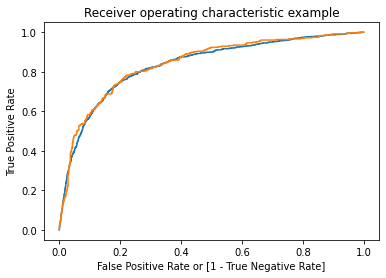

0.8357948075242901 0.8416641529572824


In [95]:
  # drawing roc
train_fpr, train_tpr, train_thresholds =  metrics.roc_curve(y_train, y_train_pred_lr_prob, drop_intermediate=False)
val_fpr, val_tpr, val_thresholds = metrics.roc_curve(y_val, y_val_pred_lr_prob, drop_intermediate=False)
train_auc_score = metrics.roc_auc_score(y_train, y_train_pred_prob)
val_auc_score = metrics.roc_auc_score(y_val, y_val_pred_prob)
plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % train_auc_score )
plt.plot( val_fpr, val_tpr, label='ROC curve (area = %0.2f)' % val_auc_score )
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()
print(train_auc_score, val_auc_score)

In [96]:
grid_lr.best_params_

{'C': 0.5, 'max_iter': 75, 'solver': 'lbfgs'}

In [97]:
cv_results = pd.DataFrame(grid_lr.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024568,0.001691,0.004686,0.000865,0.5,75,liblinear,"{'C': 0.5, 'max_iter': 75, 'solver': 'liblinear'}",0.841751,0.820148,0.802408,0.828652,0.836927,0.825977,0.013895,13,0.831960,0.838100,0.843325,0.834554,0.833661,0.836320,0.004036
1,0.069917,0.007091,0.004148,0.000143,0.5,75,lbfgs,"{'C': 0.5, 'max_iter': 75, 'solver': 'lbfgs'}",0.840678,0.821543,0.802305,0.829622,0.836430,0.826116,0.013554,1,0.832203,0.838079,0.843493,0.834600,0.833651,0.836405,0.004038
2,0.034865,0.014335,0.004263,0.000258,0.5,100,liblinear,"{'C': 0.5, 'max_iter': 100, 'solver': 'libline...",0.841751,0.820148,0.802408,0.828652,0.836927,0.825977,0.013895,13,0.831960,0.838100,0.843325,0.834554,0.833661,0.836320,0.004036
3,0.065775,0.002482,0.004111,0.000230,0.5,100,lbfgs,"{'C': 0.5, 'max_iter': 100, 'solver': 'lbfgs'}",0.840678,0.821543,0.802305,0.829622,0.836430,0.826116,0.013554,1,0.832203,0.838079,0.843493,0.834600,0.833651,0.836405,0.004038
4,0.024282,0.001028,0.004605,0.000435,0.5,125,liblinear,"{'C': 0.5, 'max_iter': 125, 'solver': 'libline...",0.841751,0.820148,0.802408,0.828652,0.836927,0.825977,0.013895,13,0.831960,0.838100,0.843325,0.834554,0.833661,0.836320,0.004036
5,0.068612,0.003634,0.005573,0.003123,0.5,125,lbfgs,"{'C': 0.5, 'max_iter': 125, 'solver': 'lbfgs'}",0.840678,0.821543,0.802305,0.829622,0.836430,0.826116,0.013554,1,0.832203,0.838079,0.843493,0.834600,0.833651,0.836405,0.004038
6,0.025842,0.001147,0.004257,0.000227,1,75,liblinear,"{'C': 1, 'max_iter': 75, 'solver': 'liblinear'}",0.840543,0.821029,0.801591,0.829622,0.837405,0.826038,0.013966,4,0.832557,0.838540,0.843868,0.834899,0.833972,0.836767,0.004064
7,0.080139,0.005409,0.004235,0.000104,1,75,lbfgs,"{'C': 1, 'max_iter': 75, 'solver': 'lbfgs'}",0.839720,0.821986,0.801739,0.829970,0.836682,0.826019,0.013585,7,0.832627,0.838409,0.843786,0.834888,0.833907,0.836723,0.004020
8,0.025369,0.001129,0.004121,0.000204,1,100,liblinear,"{'C': 1, 'max_iter': 100, 'solver': 'liblinear'}",0.840543,0.821029,0.801591,0.829622,0.837405,0.826038,0.013966,4,0.832557,0.838540,0.843868,0.834899,0.833972,0.836767,0.004064
9,0.079973,0.008194,0.005702,0.002627,1,100,lbfgs,"{'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}",0.839720,0.821986,0.801739,0.829970,0.836682,0.826019,0.013585,7,0.832627,0.838409,0.843786,0.834888,0.833907,0.836723,0.004020


In [98]:
cv_results[["param_max_iter", "param_solver", "mean_train_score","mean_test_score"]]

,param_max_iter,param_solver,mean_train_score,mean_test_score
0,75,liblinear,0.836320,0.825977
1,75,lbfgs,0.836405,0.826116
2,100,liblinear,0.836320,0.825977
3,100,lbfgs,0.836405,0.826116
4,125,liblinear,0.836320,0.825977
5,125,lbfgs,0.836405,0.826116
6,75,liblinear,0.836767,0.826038
7,75,lbfgs,0.836723,0.826019
8,100,liblinear,0.836767,0.826038
9,100,lbfgs,0.836723,0.826019


In [99]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_lr))
print("Accuracy test: ", accuracy_score(y_val, y_val_pred_lr))

Accuracy train:  0.8280187074829932
Accuracy test:  0.8419375398342893


# Random Forest Classifier

In [100]:
# Create the param grid for random forest
param_grid_rf = [{'n_estimators': [30, 50, 75, 100],
               'max_depth': [5, 6, 7, 8, 9, 10],
               'max_features': [10, 15, 25, 30]}]
print(param_grid_rf)

[{'n_estimators': [30, 50, 75, 100], 'max_depth': [5, 6, 7, 8, 9, 10], 'max_features': [10, 15, 25, 30]}]


In [101]:
rf_model = RandomForestClassifier(random_state=0)

In [102]:
grid_rf = GridSearchCV(estimator=rf_model, scoring = 'roc_auc', param_grid = param_grid_rf, n_jobs= -1, return_train_score=True)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                

In [103]:
grid_rf.best_params_

{'max_depth': 10, 'max_features': 10, 'n_estimators': 75}

In [104]:
cv_results = pd.DataFrame(grid_rf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.178312,0.006550,0.012422,0.001818,5,10,30,"{'max_depth': 5, 'max_features': 10, 'n_estima...",0.854607,0.821822,0.824088,0.822276,0.830340,0.830627,0.012370,47,0.862008,0.864343,0.861435,0.858886,0.861695,0.861674,0.001736
1,0.295008,0.010352,0.018926,0.005600,5,10,50,"{'max_depth': 5, 'max_features': 10, 'n_estima...",0.855764,0.822587,0.825711,0.824831,0.829940,0.831767,0.012233,44,0.863478,0.867222,0.864454,0.861288,0.863505,0.863989,0.001921
2,0.439074,0.005951,0.022088,0.000485,5,10,75,"{'max_depth': 5, 'max_features': 10, 'n_estima...",0.855725,0.823780,0.827183,0.825416,0.830983,0.832617,0.011799,40,0.863879,0.868255,0.865319,0.862969,0.867069,0.865498,0.001955
3,0.584864,0.011780,0.029769,0.003014,5,10,100,"{'max_depth': 5, 'max_features': 10, 'n_estima...",0.852952,0.823246,0.827440,0.825506,0.829058,0.831640,0.010831,45,0.861564,0.869195,0.865233,0.862620,0.866120,0.864946,0.002697
4,0.213158,0.006575,0.014502,0.003704,5,15,30,"{'max_depth': 5, 'max_features': 15, 'n_estima...",0.843609,0.827296,0.829796,0.821019,0.828558,0.830055,0.007420,50,0.852549,0.861563,0.859662,0.855411,0.863730,0.858583,0.004075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1.589739,0.023731,0.032581,0.001940,10,25,100,"{'max_depth': 10, 'max_features': 25, 'n_estim...",0.838975,0.828536,0.826119,0.826171,0.832704,0.830501,0.004868,48,0.940043,0.943381,0.945517,0.939262,0.941617,0.941964,0.002269
92,0.551337,0.009972,0.013098,0.000862,10,30,30,"{'max_depth': 10, 'max_features': 30, 'n_estim...",0.839611,0.822121,0.816356,0.819386,0.829943,0.825484,0.008382,77,0.932393,0.940013,0.944192,0.939717,0.939675,0.939198,0.003805
93,0.916377,0.009494,0.018617,0.000958,10,30,50,"{'max_depth': 10, 'max_features': 30, 'n_estim...",0.839007,0.827286,0.825618,0.818461,0.832400,0.828554,0.006872,59,0.936716,0.942542,0.945883,0.938759,0.940184,0.940817,0.003165
94,1.358472,0.010036,0.027430,0.005012,10,30,75,"{'max_depth': 10, 'max_features': 30, 'n_estim...",0.837342,0.827691,0.822848,0.819492,0.835526,0.828580,0.006946,58,0.936815,0.943532,0.945867,0.938894,0.943190,0.941660,0.003307


In [105]:
cv_results[["param_max_depth","param_max_features","param_n_estimators","mean_train_score","mean_test_score"]]

,param_max_depth,param_max_features,param_n_estimators,mean_train_score,mean_test_score
0,5,10,30,0.861674,0.830627
1,5,10,50,0.863989,0.831767
2,5,10,75,0.865498,0.832617
3,5,10,100,0.864946,0.831640
4,5,15,30,0.858583,0.830055
...,...,...,...,...,...
91,10,25,100,0.941964,0.830501
92,10,30,30,0.939198,0.825484
93,10,30,50,0.940817,0.828554
94,10,30,75,0.941660,0.828580


In [106]:
y_train_pred_rf, y_train_pred_rf_prob, y_val_pred_rf, y_val_pred_rf_prob = prediction_model(grid_rf, X_train, y_train, X_val, y_val)

In [159]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_rf))
print("Accuracy val: ", accuracy_score(y_val, y_val_pred_rf))
accuracy_rf = round(accuracy_score(y_val, y_val_pred_rf),3)
print(accuracy_rf)
scores['Random Forest'] = accuracy_rf

Accuracy train:  0.8988095238095238
Accuracy val:  0.8463989802421925
0.846


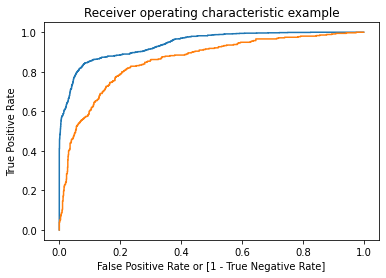

0.8357948075242901 0.8416641529572824


In [108]:
  # drawing roc
train_fpr, train_tpr, train_thresholds =  metrics.roc_curve(y_train, y_train_pred_rf_prob, drop_intermediate=False)
val_fpr, val_tpr, val_thresholds = metrics.roc_curve(y_val, y_val_pred_rf_prob, drop_intermediate=False)
train_auc_score = metrics.roc_auc_score(y_train, y_train_pred_prob)
val_auc_score = metrics.roc_auc_score(y_val, y_val_pred_prob)
plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % train_auc_score )
plt.plot( val_fpr, val_tpr, label='ROC curve (area = %0.2f)' % val_auc_score )
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()
print(train_auc_score, val_auc_score)

#  Gradient Boosting Classifier

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(verbose = 1, random_state = 0)

In [110]:
params_grid_gb = {
    "n_iter_no_change": ['None', 5, 10],
    "n_estimators": [30, 50, 75, 100],
    "learning_rate": [0.05, 0.1, 0.15]
}

In [111]:
grid_gb = GridSearchCV(estimator=gb_model, scoring = 'roc_auc', param_grid = params_grid_gb, n_jobs= -1, return_train_score=True)
grid_gb.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9950            0.41s
         2           0.9456            0.42s
         3           0.9108            0.40s
         4           0.8848            0.39s
         5           0.8655            0.38s
         6           0.8505            0.37s
         7           0.8383            0.36s
         8           0.8284            0.36s
         9           0.8206            0.35s
        10           0.8133            0.34s
        20           0.7694            0.25s
        30           0.7423            0.17s
        40           0.7221            0.08s
        50           0.7058            0.00s


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [112]:
grid_gb.best_params_

{'learning_rate': 0.15, 'n_estimators': 50, 'n_iter_no_change': 10}

In [113]:
cv_results = pd.DataFrame(grid_gb.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_n_iter_no_change,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012646,0.001926,0.000000,0.000000,0.05,30,None,"{'learning_rate': 0.05, 'n_estimators': 30, 'n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.308364,0.006344,0.005126,0.000228,0.05,30,5,"{'learning_rate': 0.05, 'n_estimators': 30, 'n...",0.829291,0.804600,0.802781,0.807608,0.821467,0.813149,0.010403,23,0.826299,0.836354,0.831670,0.833122,0.828340,0.831157,0.003540
2,0.321236,0.014762,0.004824,0.000156,0.05,30,10,"{'learning_rate': 0.05, 'n_estimators': 30, 'n...",0.829291,0.804600,0.802781,0.807608,0.821467,0.813149,0.010403,23,0.826299,0.836354,0.831670,0.833122,0.828340,0.831157,0.003540
3,0.011757,0.002853,0.000000,0.000000,0.05,50,None,"{'learning_rate': 0.05, 'n_estimators': 50, 'n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.481739,0.032913,0.005265,0.000181,0.05,50,5,"{'learning_rate': 0.05, 'n_estimators': 50, 'n...",0.838235,0.807286,0.818168,0.814437,0.833860,0.822397,0.011763,22,0.835482,0.840616,0.848512,0.842901,0.850178,0.843538,0.005342
5,0.488906,0.025877,0.005402,0.000355,0.05,50,10,"{'learning_rate': 0.05, 'n_estimators': 50, 'n...",0.843731,0.810307,0.818168,0.814437,0.833860,0.824101,0.012645,21,0.841203,0.847180,0.848512,0.842901,0.850178,0.845995,0.003399
6,0.011331,0.002447,0.000000,0.000000,0.05,75,None,"{'learning_rate': 0.05, 'n_estimators': 75, 'n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.596270,0.151869,0.005538,0.000213,0.05,75,5,"{'learning_rate': 0.05, 'n_estimators': 75, 'n...",0.838235,0.807286,0.828899,0.820084,0.839672,0.826835,0.012056,19,0.835482,0.840616,0.865591,0.846610,0.862805,0.850221,0.011976
8,0.676954,0.136502,0.005747,0.000278,0.05,75,10,"{'learning_rate': 0.05, 'n_estimators': 75, 'n...",0.860588,0.810307,0.828899,0.820084,0.839168,0.831809,0.017266,12,0.855099,0.847180,0.865591,0.846610,0.862777,0.855451,0.007787
9,0.013808,0.006617,0.000000,0.000000,0.05,100,None,"{'learning_rate': 0.05, 'n_estimators': 100, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
cv_results[["param_learning_rate","param_n_estimators","param_n_iter_no_change","mean_train_score","mean_test_score"]]

,param_learning_rate,param_n_estimators,param_n_iter_no_change,mean_train_score,mean_test_score
0,0.05,30,None,NaN,NaN
1,0.05,30,5,0.831157,0.813149
2,0.05,30,10,0.831157,0.813149
3,0.05,50,None,NaN,NaN
4,0.05,50,5,0.843538,0.822397
5,0.05,50,10,0.845995,0.824101
6,0.05,75,None,NaN,NaN
7,0.05,75,5,0.850221,0.826835
8,0.05,75,10,0.855451,0.831809
9,0.05,100,None,NaN,NaN


In [115]:
y_train_pred_gb, y_train_pred_gb_prob, y_val_pred_gb, y_val_pred_gb_prob = \
                                    prediction_model(grid_gb, X_train, y_train, X_val, y_val)

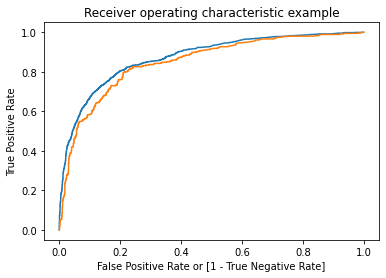

0.8357948075242901 0.8416641529572824


In [116]:
  # drawing roc
train_fpr, train_tpr, train_thresholds =  metrics.roc_curve(y_train, y_train_pred_gb_prob, drop_intermediate=False)
val_fpr, val_tpr, val_thresholds = metrics.roc_curve(y_val, y_val_pred_gb_prob, drop_intermediate=False)
train_auc_score = metrics.roc_auc_score(y_train, y_train_pred_prob)
val_auc_score = metrics.roc_auc_score(y_val, y_val_pred_prob)
plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % train_auc_score )
plt.plot( val_fpr, val_tpr, label='ROC curve (area = %0.2f)' % val_auc_score )
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()
print(train_auc_score, val_auc_score)

In [160]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_gb))
print("Accuracy val: ", accuracy_score(y_val, y_val_pred_gb))
accuracy_gb = round(accuracy_score(y_val, y_val_pred_gb),3)
print(accuracy_gb)
scores['Gradient Boosting'] = accuracy_gb

Accuracy train:  0.8535289115646258
Accuracy val:  0.8387507966857871
0.839


# SVM (Support Vector Machine)

In [118]:
from sklearn.svm import SVC

In [119]:
svc_model = SVC(random_state=0)

In [120]:
params_grid_svc = {
    "kernel": ["linear", "rbf"],
    "degree": [1, 2]
}

In [122]:
grid_svc = GridSearchCV(estimator=svc_model, scoring = 'roc_auc', param_grid = params_grid_svc, n_jobs= -1, return_train_score=True)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'degree': [1, 2], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [125]:
grid_svc.best_params_

{'degree': 1, 'kernel': 'rbf'}

In [126]:
cv_results = pd.DataFrame(grid_svc.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.485011,0.023710,0.078606,0.002887,1,linear,"{'degree': 1, 'kernel': 'linear'}",0.740927,0.732571,0.751694,0.788048,0.687842,0.740217,0.032316,3,0.734849,0.720235,0.747585,0.769490,0.689281,0.732288,0.026905
1,0.913541,0.014767,0.156041,0.006510,1,rbf,"{'degree': 1, 'kernel': 'rbf'}",0.794457,0.824860,0.776202,0.795035,0.802791,0.798669,0.015739,1,0.895468,0.889628,0.895814,0.892662,0.896858,0.894086,0.002626
2,0.460912,0.013231,0.079219,0.001410,2,linear,"{'degree': 2, 'kernel': 'linear'}",0.740927,0.732571,0.751694,0.788048,0.687842,0.740217,0.032316,3,0.734849,0.720235,0.747585,0.769490,0.689281,0.732288,0.026905
3,0.860743,0.090367,0.148644,0.020062,2,rbf,"{'degree': 2, 'kernel': 'rbf'}",0.794457,0.824860,0.776202,0.795035,0.802791,0.798669,0.015739,1,0.895468,0.889628,0.895814,0.892662,0.896858,0.894086,0.002626


In [129]:
cv_results[["param_kernel","param_degree","mean_train_score","mean_test_score"]]

,param_kernel,param_degree,mean_train_score,mean_test_score
0,linear,1,0.732288,0.740217
1,rbf,1,0.894086,0.798669
2,linear,2,0.732288,0.740217
3,rbf,2,0.894086,0.798669


In [161]:
print("Accuracy train: ", accuracy_score(y_train, grid_svc.predict(X_train)))
print("Accuracy test: ", accuracy_score(y_val, grid_svc.predict(X_val)))
accuracy_svm = round(accuracy_score(y_val, grid_svc.predict(X_val)),3)
print(accuracy_svm)
scores['SVM'] = accuracy_svm

Accuracy train:  0.8369472789115646
Accuracy test:  0.8355640535372849
0.836


# XGBoost Classifier

In [132]:
from xgboost import XGBClassifier

In [133]:
xgb_model = XGBClassifier(random_state=0)

In [134]:
# Create the param grid for random forest
param_grid_xgb = {
               'max_depth': [5, 7],
               'max_features': [10, 20, 30]}
print(param_grid_xgb)

{'max_depth': [5, 7], 'max_features': [10, 20, 30]}


In [136]:
grid_xgb = GridSearchCV(estimator=xgb_model, scoring = 'roc_auc', param_grid = param_grid_xgb, n_jobs= -1, return_train_score=True)

In [139]:
grid_xgb.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 7], 'max_features': [10, 20, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='ro

In [140]:
grid_xgb.best_params_

{'max_depth': 5, 'max_features': 10}

In [141]:
cv_results = pd.DataFrame(grid_xgb.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.010213,0.071904,0.011972,0.000332,5,10,"{'max_depth': 5, 'max_features': 10}",0.847980,0.831846,0.829757,0.838467,0.842720,0.838154,0.006749,1,0.936257,0.932533,0.941015,0.936313,0.941973,0.937618,0.003462
1,0.964396,0.010677,0.012883,0.001510,5,20,"{'max_depth': 5, 'max_features': 20}",0.847980,0.831846,0.829757,0.838467,0.842720,0.838154,0.006749,1,0.936257,0.932533,0.941015,0.936313,0.941973,0.937618,0.003462
2,0.942154,0.009529,0.011843,0.000301,5,30,"{'max_depth': 5, 'max_features': 30}",0.847980,0.831846,0.829757,0.838467,0.842720,0.838154,0.006749,1,0.936257,0.932533,0.941015,0.936313,0.941973,0.937618,0.003462
3,1.312304,0.004801,0.015533,0.002224,7,10,"{'max_depth': 7, 'max_features': 10}",0.841636,0.838319,0.827257,0.834385,0.838115,0.835942,0.004912,4,0.971826,0.971090,0.973654,0.976279,0.981755,0.974921,0.003858
4,1.315507,0.009552,0.014206,0.000364,7,20,"{'max_depth': 7, 'max_features': 20}",0.841636,0.838319,0.827257,0.834385,0.838115,0.835942,0.004912,4,0.971826,0.971090,0.973654,0.976279,0.981755,0.974921,0.003858
5,1.290091,0.045361,0.013018,0.001118,7,30,"{'max_depth': 7, 'max_features': 30}",0.841636,0.838319,0.827257,0.834385,0.838115,0.835942,0.004912,4,0.971826,0.971090,0.973654,0.976279,0.981755,0.974921,0.003858


In [142]:
cv_results[["param_max_depth","param_max_features","mean_train_score","mean_test_score"]]

,param_max_depth,param_max_features,mean_train_score,mean_test_score
0,5,10,0.937618,0.838154
1,5,20,0.937618,0.838154
2,5,30,0.937618,0.838154
3,7,10,0.974921,0.835942
4,7,20,0.974921,0.835942
5,7,30,0.974921,0.835942


In [143]:
y_train_pred_xgb, y_train_pred_xgb_prob, y_val_pred_xgb, y_val_pred_xgb_prob = \
                                    prediction_model(grid_xgb, X_train, y_train, X_val, y_val)

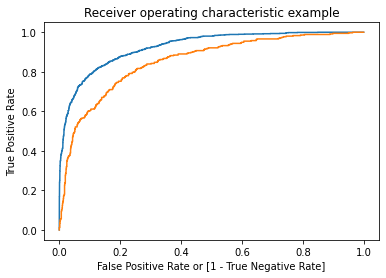

0.8357948075242901 0.8416641529572824


In [144]:
  # drawing roc
train_fpr, train_tpr, train_thresholds =  metrics.roc_curve(y_train, y_train_pred_xgb_prob, drop_intermediate=False)
val_fpr, val_tpr, val_thresholds = metrics.roc_curve(y_val, y_val_pred_xgb_prob, drop_intermediate=False)
train_auc_score = metrics.roc_auc_score(y_train, y_train_pred_prob)
val_auc_score = metrics.roc_auc_score(y_val, y_val_pred_prob)
plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % train_auc_score )
plt.plot( val_fpr, val_tpr, label='ROC curve (area = %0.2f)' % val_auc_score )
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()
print(train_auc_score, val_auc_score)

In [164]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred_xgb))
print("Accuracy test: ", accuracy_score(y_val, y_val_pred_xgb))
accuracy_xgb = round(accuracy_score(y_val, y_val_pred_xgb),3)
print(accuracy_xgb)
scores['XGBoosting'] = accuracy_xgb

Accuracy train:  0.890093537414966
Accuracy test:  0.8476736775015934
0.848


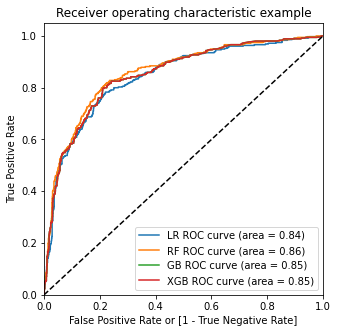

In [148]:
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve( y_val, y_val_pred_lr_prob, drop_intermediate = False )
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve( y_val, y_val_pred_rf_prob, drop_intermediate = False )
gb_fpr, gb_tpr, gb_thresholds = metrics.roc_curve( y_val, y_val_pred_gb_prob, drop_intermediate = False )
xgb_fpr, xgb_tpr, xgb_thresholds = metrics.roc_curve( y_val, y_val_pred_xgb_prob, drop_intermediate = False )
                                              
lr_auc_score = metrics.roc_auc_score( y_val, y_val_pred_lr_prob )
rf_auc_score = metrics.roc_auc_score( y_val, y_val_pred_rf_prob )
gb_auc_score = metrics.roc_auc_score( y_val, y_val_pred_gb_prob )
xgb_auc_score = metrics.roc_auc_score( y_val, y_val_pred_xgb_prob )

plt.figure(figsize=(5, 5))
plt.plot( lr_fpr, lr_tpr, label='LR ROC curve (area = %0.2f)' % lr_auc_score )
plt.plot( rf_fpr, rf_tpr, label='RF ROC curve (area = %0.2f)' % rf_auc_score )
plt.plot( gb_fpr, gb_tpr, label='GB ROC curve (area = %0.2f)' % gb_auc_score )
plt.plot( gb_fpr, gb_tpr, label='XGB ROC curve (area = %0.2f)' % xgb_auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [165]:
scores

{'Gradient Boosting': 0.848,
 'Linear Regression': 0.842,
 'Logistic Regression': 0.842,
 'Logistic Regression HyperParameter Tuned': 0.842,
 'Random Forest': 0.846,
 'SVM': 0.836,
 'XGBoosting': 0.848}

In [171]:
print('Model-Name    Score')
for model, score in scores.items():
    print('{} -> {}'.format(model, score))

Model-Name    Score
Linear Regression -> 0.842
Logistic Regression HyperParameter Tuned -> 0.842
Logistic Regression -> 0.842
Random Forest -> 0.846
Gradient Boosting -> 0.848
SVM -> 0.836
XGBoosting -> 0.848




```
According to the data we have Gradient Boositng and XGBoost performs best.
We can pick any one of those data.
Let us pick XGBoost.
Now let us train this model on full training data set.(train + validation) dataset. 

And then we will test on testing data set. 
```



# Final Model

In [183]:
frames_X = [X_train, X_val]
X_train_full = pd.concat(frames_X)
X_train_full.head()

,age,balance,housing,loan,day,pdays,previous,telephone,other,success,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,married,single,secondary,tertiary
42402,0.295775,0.026562,0,0,0.066667,0.219394,0.035088,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
31583,0.338028,0.049742,1,0,0.066667,0.163636,0.087719,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
32503,0.338028,0.032279,0,0,0.533333,0.408485,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
27007,0.436620,0.035974,1,0,0.666667,0.135758,0.017544,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
37531,0.408451,0.033471,1,0,0.400000,0.212121,0.017544,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [184]:
print(len(X_train_full))

6273


In [185]:
 frames_Y = [y_train, y_val]
 y_train_full = pd.concat(frames_Y)
 y_train_full.head()

42402    0
31583    0
32503    0
27007    0
37531    0
Name: y, dtype: int64

In [186]:
print(len(y_train_full))

6273


In [187]:
grid_xgb.fit(X_train_full, y_train_full)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 7], 'max_features': [10, 20, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='ro

In [188]:
grid_xgb.best_params_


{'max_depth': 5, 'max_features': 10}

In [189]:
y_train_pred_xgb_final, y_train_pred_xgb_prob_final, y_test_pred_xgb_final, y_test_pred_xgb_prob_final = \
                                    prediction_model(grid_xgb, X_train_full, y_train_full, X_test, y_test)

In [192]:
print("Accuracy train Full: ", accuracy_score(y_train_full, y_train_pred_xgb_final))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred_xgb_final))
accuracy_xgb_final = round(accuracy_score(y_test, y_test_pred_xgb_final),3)
print(accuracy_xgb_final)
scores['Final'] = accuracy_xgb_final

Accuracy train Full:  0.8864976885062968
Accuracy test:  0.8209050350541747
0.821
